# Draw a global analysis by NOAA GFS using OPeNDAP

31-Dec-2020

This is an example of get data through OPeNDAP and draw it into a map.

In this jupyter notebook `xarray` and `cartopy` are used.

In [1]:
%matplotlib inline
import datetime as dt
import pytz
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

NOAA provides its recent forecast data at their website: https://nomads.ncep.noaa.gov. Some of the data are provided as OPeNDAP protocol.

First, make a URL for recent analysis in UTC with `datetime` module.The URL format is (such as) http://nomads.ncep.noaa.gov:80/dods/gdas_0p25/gdas20201228/gdas_0p25_18z

In [2]:
d = dt.datetime.now(pytz.utc) - dt.timedelta(hours=9)  # 9-hour for a latency
hr = int(d.hour / 6) * 6
d, hr

(datetime.datetime(2020, 12, 31, 2, 20, 48, 393901, tzinfo=<UTC>), 0)

In [3]:
url = 'http://nomads.ncep.noaa.gov:80/dods/gdas_0p25/gdas{YMD}/gdas_0p25_{H:02}z'.format(YMD=d.strftime('%Y%m%d'),H=hr)
url

'http://nomads.ncep.noaa.gov:80/dods/gdas_0p25/gdas20201231/gdas_0p25_00z'

Fetch the OpenDAP data using `xarray`.

In [4]:
gdas_xr = xr.open_dataset(url)
gdas_xr

C:\Users\taichu\miniconda3\envs\met\lib\site-packages\xarray\coding\times.py:83: SerializationWarning: Ambiguous reference date string: 1-1-1 00:00:0.0. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-1-1 00:00:0.0). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)


<xarray.Dataset>
Dimensions:         (lat: 721, lev: 34, lon: 1440, time: 9)
Coordinates:
  * time            (time) datetime64[ns] 2020-12-31 ... 2020-12-31T08:00:00
  * lev             (lev) float64 1e+03 975.0 950.0 925.0 ... 3.0 2.0 1.0 0.4
  * lat             (lat) float64 -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon             (lon) float64 0.0 0.25 0.5 0.75 ... 359.0 359.2 359.5 359.8
Data variables:
    absvprs         (time, lev, lat, lon) float32 ...
    no4lftxsfc      (time, lat, lon) float32 ...
    no5wavh500mb    (time, lat, lon) float32 ...
    acpcpsfc        (time, lat, lon) float32 ...
    albdosfc        (time, lat, lon) float32 ...
    apcpsfc         (time, lat, lon) float32 ...
    capesfc         (time, lat, lon) float32 ...
    cape180_0mb     (time, lat, lon) float32 ...
    cape255_0mb     (time, lat, lon) float32 ...
    cfrzravesfc     (time, lat, lon) float32 ...
    cfrzrsfc        (time, lat, lon) float32 ...
    cicepavesfc     (time, lat, lon) float32 ...
    cicepsfc        (time, lat, lon) float32 ...
    cinsfc          (time, lat, lon) float32 ...
    cin180_0mb      (time, lat, lon) float32 ...
    cin255_0mb      (time, lat, lon) float32 ...
    clwmrprs        (time, lev, lat, lon) float32 ...
    clwmrhy1        (time, lat, lon) float32 ...
    cpofpsfc        (time, lat, lon) float32 ...
    cpratavesfc     (time, lat, lon) float32 ...
    cpratsfc        (time, lat, lon) float32 ...
    crainavesfc     (time, lat, lon) float32 ...
    crainsfc        (time, lat, lon) float32 ...
    csnowavesfc     (time, lat, lon) float32 ...
    csnowsfc        (time, lat, lon) float32 ...
    cwatclm         (time, lat, lon) float32 ...
    cworkclm        (time, lat, lon) float32 ...
    dlwrfsfc        (time, lat, lon) float32 ...
    dpt2m           (time, lat, lon) float32 ...
    dswrfsfc        (time, lat, lon) float32 ...
    dzdtprs         (time, lev, lat, lon) float32 ...
    fldcpsfc        (time, lat, lon) float32 ...
    gfluxsfc        (time, lat, lon) float32 ...
    grleprs         (time, lev, lat, lon) float32 ...
    grlehy1         (time, lat, lon) float32 ...
    gustsfc         (time, lat, lon) float32 ...
    hgtsfc          (time, lat, lon) float32 ...
    hgtprs          (time, lev, lat, lon) float32 ...
    hgt2pv          (time, lat, lon) float32 ...
    hgtneg2pv       (time, lat, lon) float32 ...
    hgttop0c        (time, lat, lon) float32 ...
    hgt0c           (time, lat, lon) float32 ...
    hgtmwl          (time, lat, lon) float32 ...
    hgttrop         (time, lat, lon) float32 ...
    hindexsfc       (time, lat, lon) float32 ...
    hlcy3000_0m     (time, lat, lon) float32 ...
    hpblsfc         (time, lat, lon) float32 ...
    icahtmwl        (time, lat, lon) float32 ...
    icahttrop       (time, lat, lon) float32 ...
    icecsfc         (time, lat, lon) float32 ...
    iceg_10m        (time, lat, lon) float32 ...
    icmrprs         (time, lev, lat, lon) float32 ...
    icmrhy1         (time, lat, lon) float32 ...
    icsevprs        (time, lev, lat, lon) float32 ...
    landsfc         (time, lat, lon) float32 ...
    landnsfc        (time, lat, lon) float32 ...
    lftxsfc         (time, lat, lon) float32 ...
    lhtflsfc        (time, lat, lon) float32 ...
    msletmsl        (time, lat, lon) float32 ...
    o3mrprs         (time, lev, lat, lon) float32 ...
    pevprsfc        (time, lat, lon) float32 ...
    plpl255_0mb     (time, lat, lon) float32 ...
    potsig995       (time, lat, lon) float32 ...
    prateavesfc     (time, lat, lon) float32 ...
    pratesfc        (time, lat, lon) float32 ...
    preslclb        (time, lat, lon) float32 ...
    preslclt        (time, lat, lon) float32 ...
    presmclb        (time, lat, lon) float32 ...
    presmclt        (time, lat, lon) float32 ...
    preshclb        (time, lat, lon) float32 ...
    preshclt        (time, lat, lon) float32 ...
    pressfc         (time, lat, lon) float32 ...
    pres80m

Draw the 2-m height air temperature using `cartopy` + `matplotlib`.

Text(0.5, 1.0, 'GDAS 2-m temperature : 2020-12-31 00:00z')

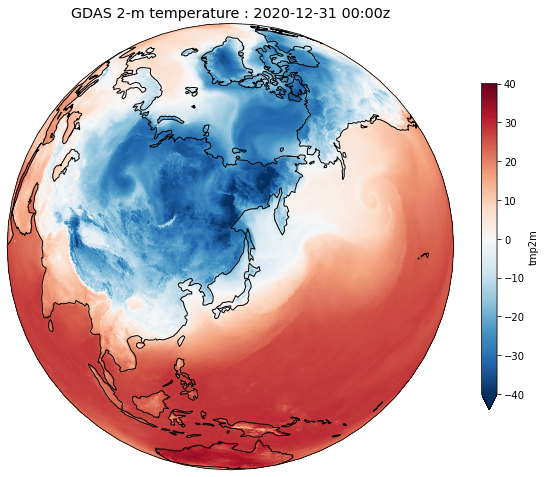

In [5]:
fig = plt.figure(figsize=(10.0, 10.0))
proj = ccrs.Orthographic(135.0, 50.0)
ax = fig.add_subplot(1, 1, 1, projection=proj)
ax.set_global()
ax.coastlines()

t = 0
tmp2m = gdas_xr.tmp2m.isel(time=t) - 273.15

tmp2m.plot(ax=ax, cmap='RdBu_r', vmin=-40.0, vmax=40.0,
           transform=ccrs.PlateCarree(),
           cbar_kwargs={'shrink': 0.6})

ax.set_title(f'GDAS 2-m temperature : {gdas_xr.time[t].dt.strftime("%Y-%m-%d %H:%Mz").data}',
             fontsize='x-large')

In [6]:
plt.savefig('GDAS_tmp2m_{}.png'.format(gdas_xr.time[t].dt.strftime("%Y%m%d%H%M").data), dpi=300)

<Figure size 432x288 with 0 Axes>